# Expresso Churn Prediction

## Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

## Loading Data

In [9]:
df = pd.read_csv("Train.csv")
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [10]:
df.shape

(2154048, 19)

In [11]:
df.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [12]:
df.drop('user_id', axis=1, inplace=True) # Just a unique Identifier

In [13]:
df.drop('MRG', axis=1, inplace=True) # All data points

## Data Exploration

| Variable         | Definition                                                | Type         |
|------------------|-----------------------------------------------------------|--------------|
| user_id          | Unique identifier for each client                         | Categorical  |
| REGION           | The location of each client                               | Categorical  |
| TENURE           | Duration in the network                                   | Categorical      |
| MONTANT          | Top-up amount                                             | Numeric      |
| FREQUENCE_RECH   | Number of times the customer refilled                     | Numeric      |
| REVENUE          | Monthly income of each client                             | Numeric      |
| ARPU_SEGMENT     | Income over 90 days / 3                                   | Numeric      |
| FREQUENCE        | Number of times the client has made an income             | Numeric      |
| DATA_VOLUME      | Number of connections                                     | Numeric      |
| ON_NET           | Inter Expresso call                                       | Numeric      |
| ORANGE           | Call to Orange                                            | Numeric      |
| TIGO             | Call to Tigo                                              | Numeric      |
| ZONE1            | Call to Zone1                                             | Numeric      |
| ZONE2            | Call to Zone2                                             | Numeric      |
| MRG              | A client who is going                                     | Categorical  |
| REGULARITY       | Number of times the client is active for 90 days          | Numeric      |
| TOP_PACK         | The most active packs                                     | Categorical  |
| FREQ_TOP_PACK    | Number of times the client has activated top pack packages| Numeric      |
| CHURN            | Variable to predict – Target                              | Categorical  |


### Categorical Varaibles

In [14]:
cat_variables = ["TOP_PACK", "REGION", "TENURE"]

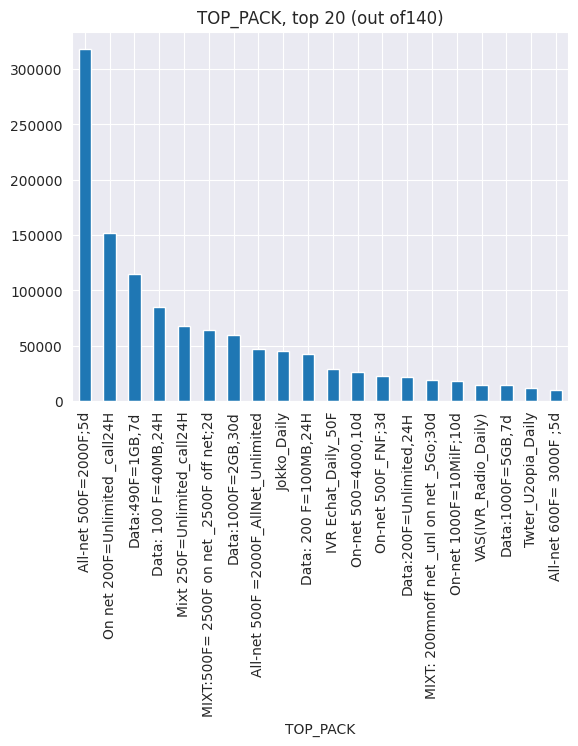

In [15]:
df['TOP_PACK'].value_counts()[:20].plot(kind='bar')
plt.title("TOP_PACK, top 20 (out of" + str(len(df['TOP_PACK'].value_counts())) + ")")
plt.show()

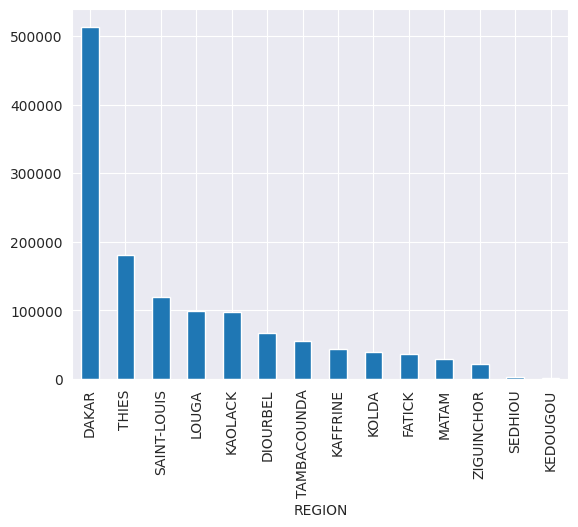

In [16]:
df['REGION'].value_counts().plot(kind='bar')
plt.show()

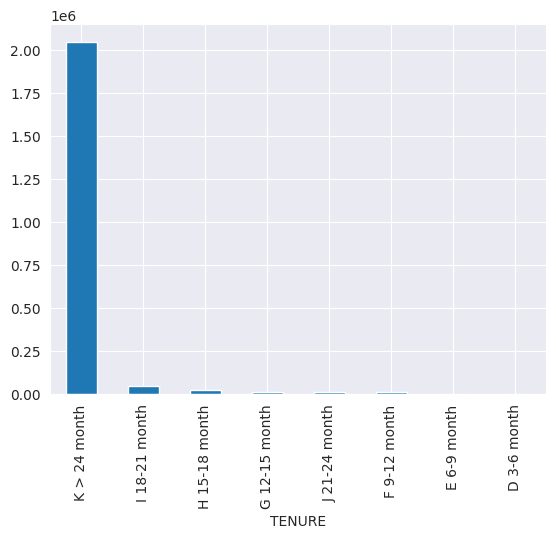

In [17]:
df['TENURE'].value_counts().plot(kind='bar')
plt.show()

### Numerical Variables

In [18]:
num_variables = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK']

In [19]:
df[num_variables].isna().sum() / len(df)

,0
MONTANT,0.351310
FREQUENCE_RECH,0.351310
REVENUE,0.337062
ARPU_SEGMENT,0.337062
FREQUENCE,0.337062
DATA_VOLUME,0.492298
ON_NET,0.365208
ORANGE,0.415612
TIGO,0.598880
ZONE1,0.921208


In [20]:
df[num_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


In [21]:
high_corr = df[num_variables + ['CHURN']].corr()['CHURN'].abs().sort_values(ascending=False)

## Basic Data Cleaning

#### Tenure to Numerical Values

In [24]:
def map_tenure(row):
    mapping_dict = {'K > 24 month': 24, 'I 18-21 month': 18, 'H 15-18 month': 15, 'G 12-15 month': 12, 'J 21-24 month': 21, 'F 9-12 month': 9, 'E 6-9 month': 6, 'D 3-6 month': 3}
    row['TENURE'] = mapping_dict[row['TENURE']]
    return row


In [28]:
mapping_dict = {'K > 24 month': 24, 'I 18-21 month': 18, 'H 15-18 month': 15, 'G 12-15 month': 12, 'J 21-24 month': 21, 'F 9-12 month': 9, 'E 6-9 month': 6, 'D 3-6 month': 3}


In [29]:
df['TENURE'] = df["TENURE"].apply(lambda x: mapping_dict[x])

#### New Column Unlimited Pack

In [50]:
df['unlimited_pack'] = 0

In [51]:
df.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,unlimited_pack
0,FATICK,24,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,On net 200F=Unlimited _call24H,8.0,0,0
1,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,1,0
2,NaN,24,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,On-net 1000F=10MilF;10d,1.0,0,0
3,DAKAR,24,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,"Data:1000F=5GB,7d",11.0,0,0
4,DAKAR,24,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0,0


In [62]:
df.loc[df['TOP_PACK'].str.contains("unlimited", case=False, na=False), 'unlimited_pack'] = 1

In [64]:
df['unlimited_pack'].value_counts()

,count
unlimited_pack,
0,1863885
1,290163


#### TOP Pack Column feature extraction

In [90]:
df['TOP_PACK'].value_counts().describe()

,count
count,140.000000
mean,8938.957143
std,33491.194518
min,1.000000
25%,4.500000
50%,112.000000
75%,1355.500000
max,317802.000000


In [93]:
df['TOP_PACK'].value_counts()

,count
TOP_PACK,
All-net 500F=2000F;5d,317802
On net 200F=Unlimited _call24H,152295
"Data:490F=1GB,7d",115180
"Data: 100 F=40MB,24H",84649
Mixt 250F=Unlimited_call24H,67512
...,...
Data_Mifi_20Go,1
APANews_monthly,1
NEW_CLIR_TEMPRESTRICTED_LIBERTE_MOBILE,1


In [ ]:
low = 4.5
mid = 112
high = 1335
def pack_pop(pack):

  if pack is np.nan:
    return 2

  val = df['TOP_PACK'].value_counts()[pack]

  if val < low:
    return 0
  elif val < mid:
    return 1
  else:
    return 2
df["PACK_POP"] = df['TOP_PACK'].apply(lambda x: pack_pop(x))

#### Saving Data to csv File

In [68]:
df.to_csv('data.csv', index=False)

In [69]:
data = pd.read_csv('data.csv')

### Train Test Split

In [74]:
df = data.copy()

In [75]:
from sklearn.model_selection import train_test_split

X = df.drop('CHURN', axis=1)
y = df['CHURN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [76]:
print("% of positive samples in train",y_train.sum() / len(y_train))
print("% of positive samples in test",y_test.sum() / len(y_test))



% of positive samples in train 0.18737226082526034
% of positive samples in test 0.18824771941226992


### Decision Tree

In [87]:
df['TOP_PACK'].value_counts()[100:150]

,count
TOP_PACK,
GPRS_3000Equal10GPORTAL,5
All-net 500= 4000off+4000on;24H,5
EVC_700Mo,5
pack_chinguitel_24h,5
CVM_On-net 400f=2200F,5
CVM_On-net 1300f=12500,3
APANews_weekly,2
EVC_1Go,2
EVC_MEGA10000F,2
